## Load Results

In [1]:
import pandas as pd
from setup import out_dir

In [70]:
results = pd.read_csv(out_dir+"AE_tries.csv")

results['model_arch'] = [x[0] for x in results['model_run_date'].str.split("-")]

results.loc[results.groupby(["loss_func","normalization","model_arch","latent_dim"]).idxmin()['test_loss']]

<ipython-input-70-d975fd7cdc99>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  results.loc[results.groupby(["loss_func","normalization","model_arch","latent_dim"]).idxmin()['test_loss']]


,model_run_date,zoomlevel,latent_dim,image_size,normalization,base_lr,weight_decay,best_epoch,train_loss,test_loss,converged,loss_func,model_arch
17,2210gan-0,zoom15,64,64,2,0.001,0.0001,80,0.0314,0.0317,1,cosh,2210gan
19,2210gan-0,zoom15,256,64,2,0.001,0.0001,105,0.0243,0.0245,1,cosh,2210gan
22,2210gan-0,zoom15,512,64,2,0.001,0.0001,140,0.0237,0.0238,1,cosh,2210gan
15,2210gan-0,zoom15,64,64,0,0.001,0.0001,50,0.0166,0.0166,0,mse,2210gan
14,2210gan-0,zoom15,256,64,0,0.001,0.0001,90,0.0134,0.0133,0,mse,2210gan
8,2210r1-1,zoom15,64,64,0,0.001,0.0010,50,0.0232,0.0280,1,mse,2210r1
9,2210r1-1,zoom15,256,64,0,0.001,0.0010,60,0.0232,0.0237,1,mse,2210r1
10,2210rx-0,zoom15,64,64,0,0.001,0.0001,55,0.0211,0.0212,1,mse,2210rx
11,2210rx-0,zoom15,256,64,0,0.001,0.0001,60,0.0216,0.0217,1,mse,2210rx
12,2210rx-0,zoom15,2048,64,0,0.001,0.0001,55,0.0217,0.0217,1,mse,2210rx


## Load data

In [12]:
# Data Attributes
from setup import image_dir, data_dir

zoomlevel = "zoom15"
batch_size = 64
num_workers = 8
image_size = 64
data_version = '1571'
sampling = 'stratified'

In [13]:
from dataloader import image_loader
_, test_loader0 = image_loader(image_dir+zoomlevel+"/", data_dir, batch_size, 
     num_workers, image_size, 
     data_version=data_version, 
     sampling=sampling, 
     recalculate_normalize=False,
     augment=False,
     norm=0)

28278 images in dataset
3142 images in dataset


In [14]:
_, test_loader1 = image_loader(image_dir+zoomlevel+"/", data_dir, batch_size, 
     num_workers, image_size, 
     data_version=data_version, 
     sampling=sampling, 
     recalculate_normalize=False,
     augment=False,
     norm=1)


28278 images in dataset
3142 images in dataset


In [15]:
_, test_loader2 = image_loader(image_dir+zoomlevel+"/", data_dir, batch_size, 
     num_workers, image_size, 
     data_version=data_version, 
     sampling=sampling, 
     recalculate_normalize=False,
     augment=False,
     norm=2)

28278 images in dataset
3142 images in dataset


## Load Trained Model

In [16]:
%load_ext autoreload
%autoreload 2

In [66]:
from setup import model_dir, image_dir, out_dir, data_dir
from util_model import parse_args

latent_dim = '64'
image_size = str(image_size)
im_norm = '2'
model_run_date = "2210gan-0"
model_type = 'dcgan'
loss_func = 'mse'

args = parse_args(s=['--zoomlevel', zoomlevel, '--latent_dim', latent_dim, '--image_size', image_size, \
                   '--im_norm', im_norm, '--model_run_date', model_run_date, '--model_type', model_type, \
                    '--loss_func', loss_func])

from util_model import dcgan_config, resnext_config, load_model


if args.model_type == 'dcgan':
    config = dcgan_config(args)

    encoder = load_model('dcgan', 'Discriminator', config)
    decoder = load_model('dcgan', 'Generator', config)
        
elif args.model_type == 'resnet':
    encoder = load_model('resnet', 'Encoder', config)
    decoder = load_model('resnet', 'Decoder', config)

elif args.model_type == 'resnet1':
    encoder = load_model('resnet1', 'ResNet18Enc', config)
    decoder = load_model('resnet1', 'ResNet18Dec', config)

elif args.model_type == 'resnext':
    
    config = resnext_config(args)
    encoder = load_model('resnext', 'Encoder', config)
    decoder = load_model('resnext', 'Decoder', config)


config['encoder'] = encoder
config['decoder'] = decoder

model = load_model('autoencoder','Autoencoder_raw', config)

# Check one model exists for this config
import glob
import torch

if loss_func == 'cosh':
    model_path = glob.glob(model_dir+"cosh/AE_"+zoomlevel+"_"+str(latent_dim)+"_"+str(image_size)+
                       "_"+str(int(im_norm))+"_"+str(model_run_date)+"_*.pt")
else:
    model_path = glob.glob(model_dir+"AE_"+zoomlevel+"_"+str(latent_dim)+"_"+str(image_size)+
                       "_"+str(int(im_norm))+"_"+str(model_run_date)+"_*.pt")

if len(model_path) == 1:
    saved = torch.load(model_path[0])
    print(model_path[0], "loaded.")
else:
    print("Error. More than one model or no model exists.")
    print(model_path)
    print(model_dir+"AE_"+zoomlevel+"_"+str(latent_dim)+"_"+str(image_size)+
                       "_"+str(int(im_norm))+"_"+str(model_run_date)+"_*.pt")

model.load_state_dict(saved['model_state_dict']);
model.eval();

/dreambig/qingyi/image_chicago/models/AE_zoom15_64_64_2_2210gan-0_85.pt loaded.


In [36]:
import matplotlib.pyplot as plt

def plot_reconstruction(plot_image):
    fig, ax = plt.subplots(1, 2, figsize=(5,2))
    ax[0].imshow(data[plot_image,:,:,:].permute(1,2,0).detach().cpu().numpy())
    ax[0].axis('off')
    ax[1].imshow(recon_imgs[plot_image,:,:,:].permute(1,2,0).detach().cpu().numpy())
    ax[1].axis('off')
    

## Normalization 0: [0,1]

In [44]:
for step, (image_list, data) in enumerate(test_loader0):
    break
recon_imgs = model(data)

In [ ]:
# /dreambig/qingyi/image_chicago/models/cosh/AE_zoom15_64_64_0_2210gan-0_.pt
plot_reconstruction(8)
plot_reconstruction(15)

In [ ]:
# /dreambig/qingyi/image_chicago/models/AE_zoom15_32_64_0_2210gan-0_.pt
plot_reconstruction(8)
plot_reconstruction(15)

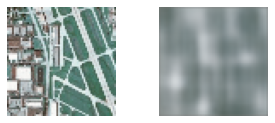

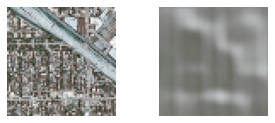

In [45]:
#/dreambig/qingyi/image_chicago/models/AE_zoom15_64_64_0_2210gan-1_65.pt

plot_reconstruction(8)
plot_reconstruction(15)

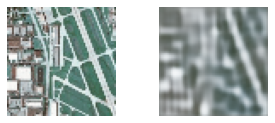

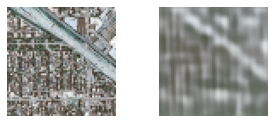

In [41]:
# /dreambig/qingyi/image_chicago/models/AE_zoom15_256_64_0_2210gan-0_90.pt

plot_reconstruction(8)
plot_reconstruction(15)

In [ ]:
# /dreambig/qingyi/image_chicago/models/AE_zoom15_512_64_0_2210gan-0_.pt

plot_reconstruction(8)
plot_reconstruction(15)

## Normalization 1: standard normal

In [63]:
import util_image

if zoomlevel == 'zoom13':
    mean = [0.3733, 0.3991, 0.3711]
    std = [0.2173, 0.2055, 0.2143]
elif zoomlevel == 'zoom15':
    mean = [0.3816, 0.4169, 0.3868]
    std = [0.1960, 0.1848, 0.2052]

In [64]:
for step, (image_list, data) in enumerate(test_loader1):
    break
recon_imgs = model(data)
data = util_image.inverse_transform(data, mean, std)
recon_imgs = util_image.inverse_transform(recon_imgs, mean, std)


In [ ]:
# /dreambig/qingyi/image_chicago/models/AE_zoom15_64_64_1_2210gan-0_90.pt

plot_reconstruction(8)
plot_reconstruction(15)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


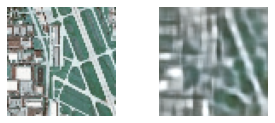

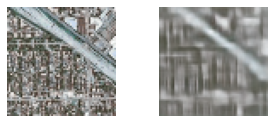

In [65]:
# /dreambig/qingyi/image_chicago/models/AE_zoom15_256_64_1_2210gan-0_115.pt
plot_reconstruction(8)
plot_reconstruction(15)

In [ ]:
# /dreambig/qingyi/image_chicago/models/AE_zoom15_512_64_1_2210gan-0_115.pt

plot_reconstruction(8)
plot_reconstruction(15)

## Normalization 2: ~[-1,+1]


In [67]:
mean = [0.5,0.5,0.5]
std = [0.5,0.5,0.5]

import util_image
for step, (image_list, data) in enumerate(test_loader2):
    break
    
recon_imgs = model(data)
data = util_image.inverse_transform(data, mean, std)
recon_imgs = util_image.inverse_transform(recon_imgs, mean, std)

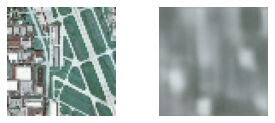

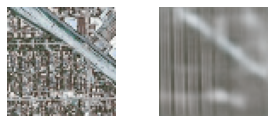

In [69]:
# /dreambig/qingyi/image_chicago/models/AE_zoom15_64_64_2_2210gan-0_85.pt

plot_reconstruction(8)
plot_reconstruction(15)

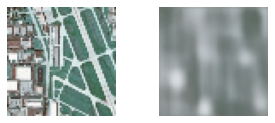

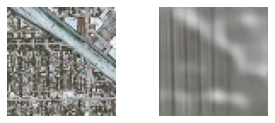

In [55]:
# /dreambig/qingyi/image_chicago/models/cosh/AE_zoom15_64_64_2_2210gan-0_80.pt

plot_reconstruction(8)
plot_reconstruction(15)

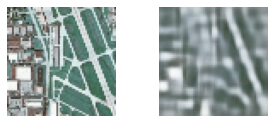

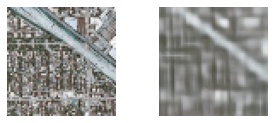

In [37]:
# /dreambig/qingyi/image_chicago/models/AE_zoom15_256_64_2_2210gan-0_105.pt

plot_reconstruction(8)
plot_reconstruction(15)

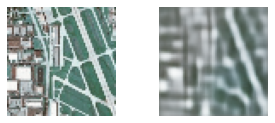

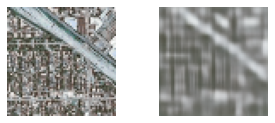

In [51]:
# /dreambig/qingyi/image_chicago/models/cosh/AE_zoom15_256_64_2_2210gan-0_105.pt

plot_reconstruction(8)
plot_reconstruction(15)

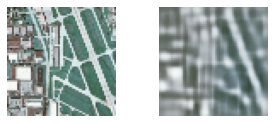

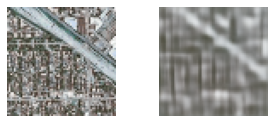

In [61]:
# /dreambig/qingyi/image_chicago/models/cosh/AE_zoom15_512_64_2_2210gan-0_140.pt

plot_reconstruction(8)
plot_reconstruction(15)